# reaching_go_spout_bar_nov22

Quick analysis of instrumental reaching

In [84]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *
from trialexp.process.pycontrol_utils import *
import seaborn as sns


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Create an experiment object


In [12]:
# Only analyze an experimental session

pycontrol_dir = 'Z:\\Teris\\ASAP\\pycontrol\\reaching_go_spout_nov22\\'
# filename = 'kms060-2023-02-07-124852.txt'
filename = 'kms062-2023-02-06-112451.txt'



### Analyze events and state

In [13]:
#Create experiment object
exp_cohort = Experiment(pycontrol_dir+filename, update = True) #TODO
session = exp_cohort.sessions[0]

# Parse event data
df_events = parse_events(session)

# separate into trials
trigger = ('waiting_for_spout','state_change')
df_events = add_trial_number(df_events, trigger)
df_events

,state,event_name,time,trial_number
1,short_break,state_change,0,0
2,short_break,bar_off,345,0
3,short_break,bar,425,0
4,short_break,bar_off,795,0
5,short_break,bar,1292,0
...,...,...,...,...
550,busy_win,bar,201003,20
551,busy_win,bar_off,201085,20
552,busy_win,bar,201102,20
553,busy_win,bar_off,201118,20


# Analyze rewards

In [70]:
df_reward = df_events[df_events.event_name == 'US_delay_timer']

## Analyze the first spout time

In [81]:
df_first_spout = df_events[(df_events.state=='waiting_for_spout') & (df_events.event_name =='spout')].copy()
df_trial_start = df_events[(df_events.state=='waiting_for_spout') & (df_events.event_name =='state_change')].copy()
assert len(df_first_spout) == len(df_trial_start)

df_first_spout['time_first_spout'] = (df_first_spout.time.values - df_trial_start.time.values)/1000 #time is in miliseconds
df_first_spout.trial_number = df_first_spout.trial_number.astype(str) #hack to force seaborn to treat this as categoric variable

## Plotting

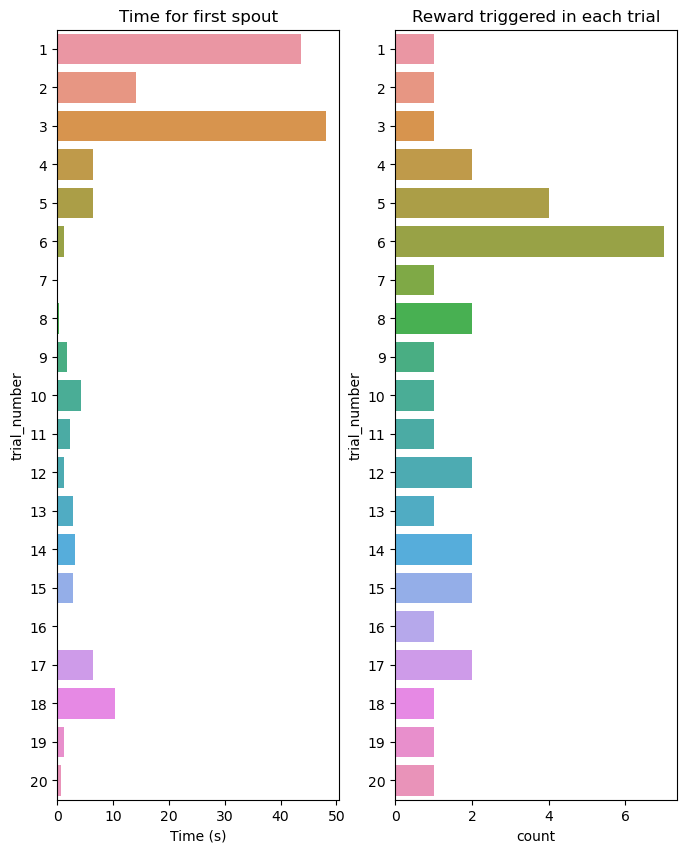

<Figure size 800x1200 with 0 Axes>

In [82]:
fig,ax = plt.subplots(1,2,figsize=(8,10))

sns.barplot( y='trial_number', x='time_first_spout', data=df_first_spout, ax=ax[0])
ax[0].set(xlabel='Time (s)',title='Time for first spout');

plt.figure(figsize=(8,12))
sns.countplot(y='trial_number', data=df_reward, ax = ax[1])
ax[1].set(title='Reward triggered in each trial');



### Summary statistics

In [83]:
print(f'Total reward: {len(df_reward)}')
print(f'Total trials: {df_events.iloc[-1].trial_number}')

#Calculate overall success rate
success_rate = (df_reward.groupby('trial_number').event_name.count()>0).mean()
print(f'Success rate: {success_rate}')

#average reward recieved per trial
average_reward = df_reward.groupby('trial_number').event_name.count().mean()
print(f'Average reward per trial: {average_reward}')

#average time to first spout in waiting_for_spout
print(f'Average first spout time {df_first_spout.time_first_spout.mean():.2f}s')

Total reward: 35
Total trials: 20
Success rate: 1.0
Average reward per trial: 1.75
Average first spout time 7.89s


# Event plots

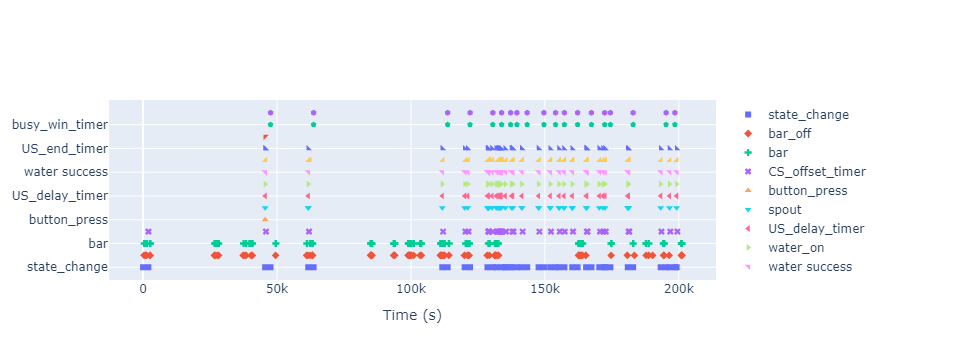

In [102]:
keys = df_events.event_name.unique()
state_def = [{'name': 'hold_for_water', 'onset': 'hold_for_water', 'offset': 'waiting_for_spout'},
                    {'name': 'waiting_for_spout', 'onset': 'waiting_for_spout',
                    'offset': 'busy_win'},
                    {'name': 'busy_win', 'onset': 'busy_win',
                        'offset': 'break_after_water'},
                    {'name': 'break_after_water', 'onset': 'break_after_water',    'offset': 'waiting_for_bar'},
                    {'name': 'break_after_no_water',       'onset': 'break_after_no_water', 'offset': 'waiting_for_bar'}]


plot_session(df_events, keys, state_def)

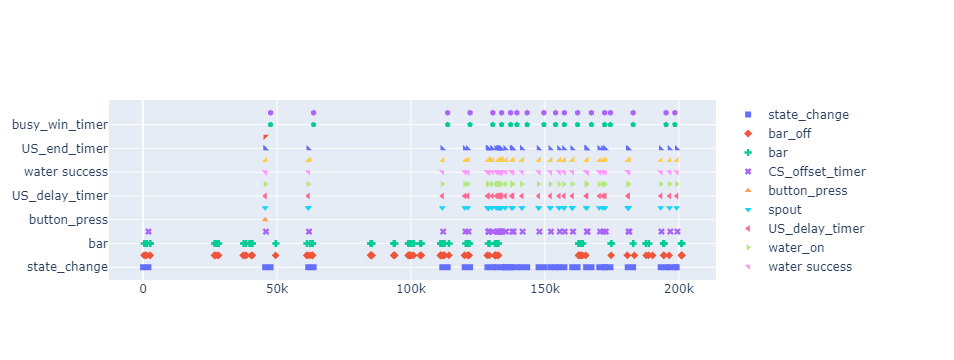

In [101]:
raw_symbols  = SymbolValidator().values
symbols = [raw_symbols[i+2] for i in range(0, len(raw_symbols), 12)]
y_index = 0 
fig = go.Figure()

df = df_events.copy()
for kind, k in enumerate(keys):
    y_index += 1
    df_evt2plot = df[df.event_name==k]
    line1 = go.Scatter(x=df_evt2plot.time, y=[k]
                * len(df_evt2plot), 
                       name=k, mode='markers', marker_symbol=symbols[y_index % 40])
    fig.add_trace(line1)
    
fig.show()

T:\Data\head-fixed\kms_pycontrol\smrx\JC314L-2022-11-30-153050_reaching_go_spout_bar_nov22.smrx


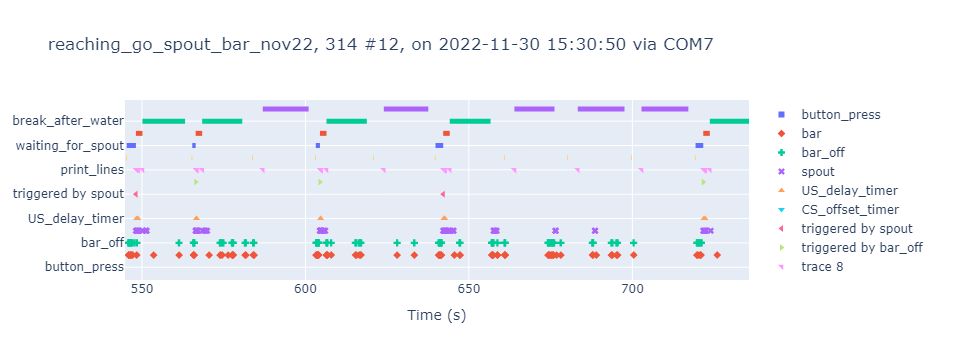

saved T:\Data\head-fixed\kms_pycontrol\smrx\JC314L-2022-11-30-153050_reaching_go_spout_bar_nov22.smrx
T:\Data\head-fixed\kms_pycontrol\smrx\JC316L-2022-11-30-163444_reaching_go_spout_bar_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_34176\1411532665.py:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



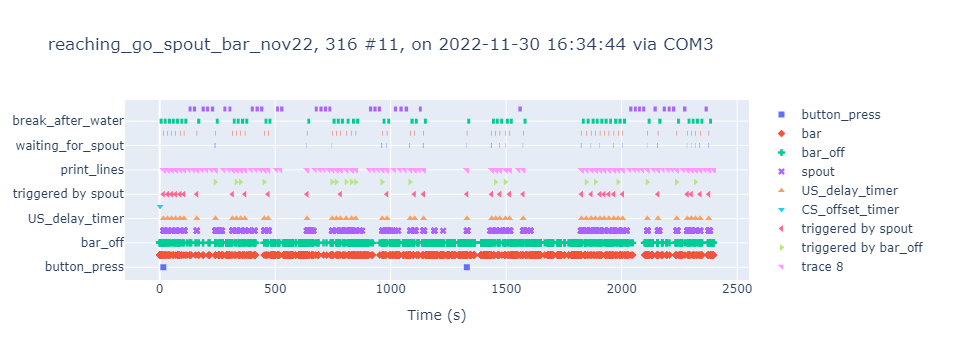

saved T:\Data\head-fixed\kms_pycontrol\smrx\JC316L-2022-11-30-163444_reaching_go_spout_bar_nov22.smrx


C:\Users\phar0528\AppData\Local\Temp\ipykernel_34176\1411532665.py:48: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [23]:
keys = [
        'button_press', 'bar', 'bar_off', 'spout', 'US_delay_timer', 'CS_offset_timer']
state_def = [{'name': 'hold_for_water', 'onset': 'hold_for_water', 'offset': 'waiting_for_spout'},
                    {'name': 'waiting_for_spout', 'onset': 'waiting_for_spout',
                    'offset': 'busy_win'},
                    {'name': 'busy_win', 'onset': 'busy_win',
                        'offset': 'break_after_water'},
                    {'name': 'break_after_water', 'onset': 'break_after_water',    'offset': 'waiting_for_bar'},
                    {'name': 'break_after_no_water',       'onset': 'break_after_no_water', 'offset': 'waiting_for_bar'}]
summary_df = pd.DataFrame()

for ss in exp_cohort.sessions:

    file_name = os.path.split(ss.file_name)
    file_name_ = re.sub('\.txt',  f'_{ss.task_name}.smrx', file_name[1])
    smrxname = os.path.join(smrx_folder_path, file_name_)
    print(smrxname)


    bw = ss.times['busy_win']
    sp = ss.times['spout']

    x_spout = [this_bw for this_bw in bw for spouts in sp if (
        spouts < this_bw) and (this_bw - spouts < 100)]

    x_bar = [this_bw for this_bw in bw if not any(
        [(spouts < this_bw) and (this_bw - spouts < 100) for spouts in sp])]
        
    event_ms = [{
        'name': 'triggered by spout',
        'time_ms': x_spout
    },
        {
            'name': 'triggered by bar_off',
            'time_ms': x_bar
    }
    ]

    if re.search('11\-23',ss.file_name): #adapt to a bug 
        state_def[-1]['offset'] = 'wating_for_bar'
    else:
        state_def[-1]['offset'] = 'waiting_for_bar'


    ss.plot_session(
        keys, state_def, export_smrx=True, event_ms=event_ms, srmx_filename= smrxname)

    summary_df = summary_df.append({
        'file':ss.file_name,
        'task':ss.task_name,
        'triggered_by_spout': len(x_spout),
        'triggered_by_bar_off': len(x_bar),
        'reaching_trials': len(bw),
        'trials': len(ss.times['hold_for_water'])},
        ignore_index=True)
